Epoch 1/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - acc: 0.5665 - loss: 1.1203 - val_acc: 0.8079 - val_loss: 0.7994
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - acc: 0.7151 - loss: 0.8243 - val_acc: 0.8808 - val_loss: 0.6813
Epoch 3/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - acc: 0.8006 - loss: 0.7544 - val_acc: 0.9139 - val_loss: 0.5775
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - acc: 0.8465 - loss: 0.6537 - val_acc: 0.9603 - val_loss: 0.5108
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - acc: 0.8837 - loss: 0.5847 - val_acc: 0.9603 - val_loss: 0.4808
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - acc: 0.8847 - loss: 0.5812 - val_acc: 0.9536 - val_loss: 0.4600
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - acc: 0.8986 - loss: 0.5110 - val_acc: 0.9669 - val_loss: 0.4295
Epoch 8/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - acc: 0.9061 - loss: 0.5138 - val_acc: 0.9470 - val_loss: 0.4373
Epoch 9/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 

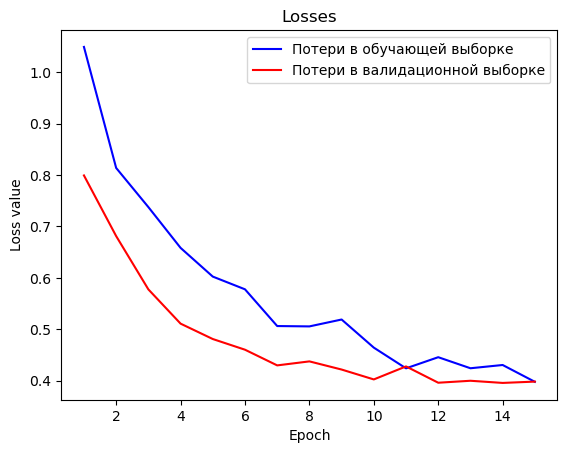

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


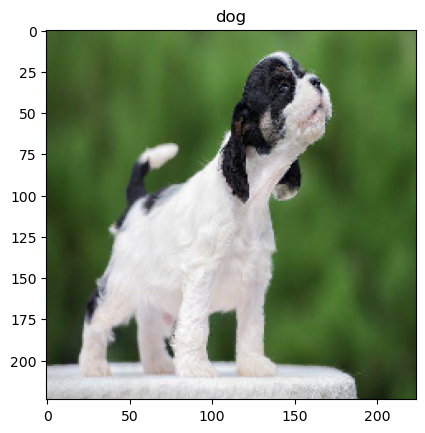

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


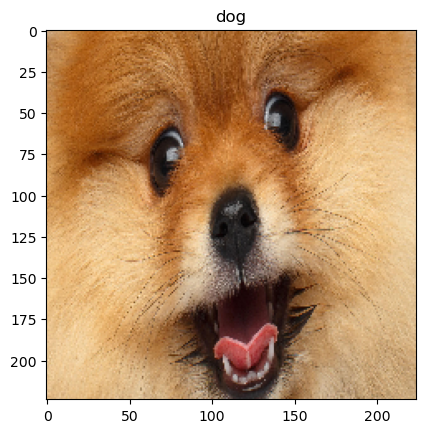

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


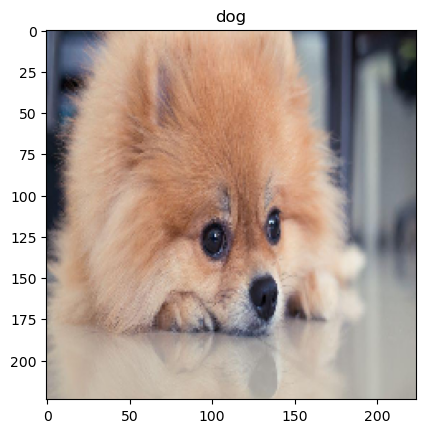

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


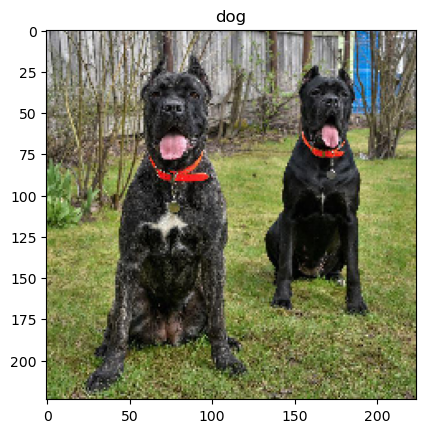

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


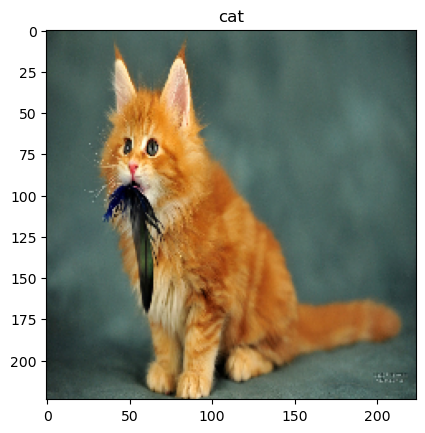

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


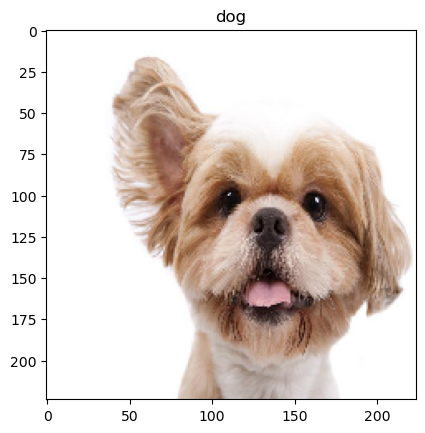

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


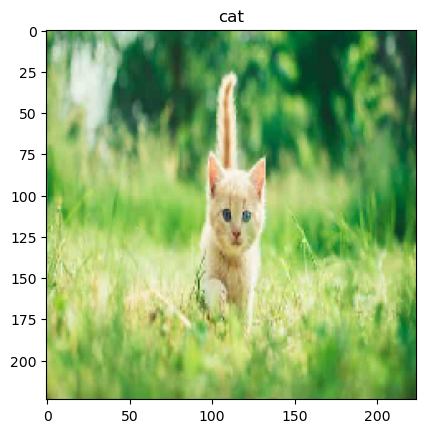

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


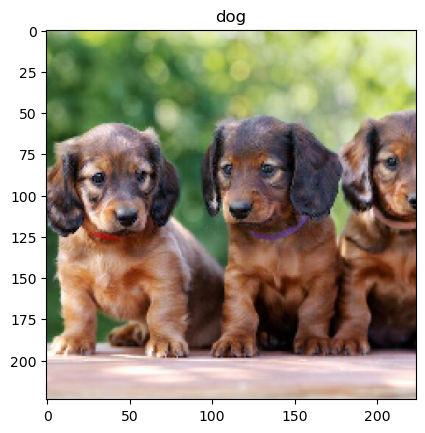

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


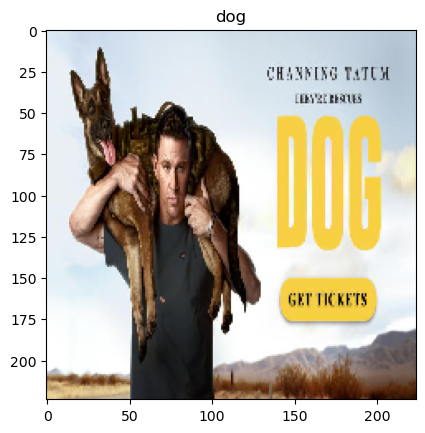

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


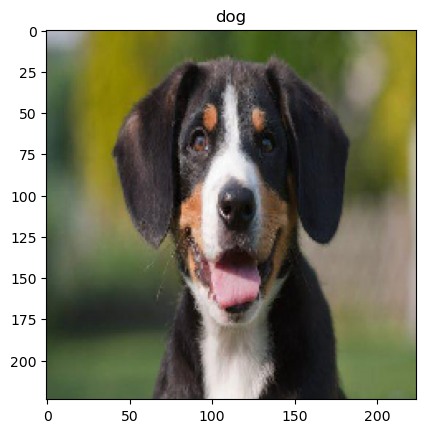

In [26]:
# Импорт библиотек
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import random
import math

# Параметры данных и модели
TRAIN_DATA_DIR = 'CatsDogs/train'
VALIDATION_DATA_DIR = 'CatsDogs/test'
TRAIN_SAMPLES = 1000
VALIDATION_SAMPLES = 200
NUM_CLASSES = 2
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 5

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

# Оставляем остальную часть кода без изменений

# Создание модели с увеличенной регуляризацией
def model_maker():
    base_model = MobileNet(include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    for layer in base_model.layers:
        layer.trainable = False
    
    input = Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    custom_model = base_model(input)
    custom_model = GlobalAveragePooling2D()(custom_model)
    custom_model = Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(custom_model)
    custom_model = Dropout(0.5)(custom_model)
    predictions = Dense(NUM_CLASSES, activation='softmax')(custom_model)
    
    return Model(inputs=input, outputs=predictions)

model = model_maker()

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['acc']
)

num_steps = math.ceil(float(TRAIN_SAMPLES) / BATCH_SIZE)

# Обучение модели
history = model.fit(
    train_generator,
    steps_per_epoch=num_steps,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=num_steps
)

# Визуализация потерь
loss_function = history.history['loss']
val_loss_function = history.history['val_loss']
epochs = range(1, len(loss_function) + 1)

plt.title('Losses')
plt.plot(epochs, loss_function, color='blue', label='Потери в обучающей выборке')
plt.plot(epochs, val_loss_function, color='red', label='Потери в валидационной выборке')
plt.xlabel('Epoch')
plt.ylabel('Loss value')
plt.legend()
plt.show()

# Демонстрация работы модели на тестовых изображениях
categ = ['cat', 'dog']
files = []

for root, dirs, filenames in os.walk('CatsDogs/test/cats'):
    for filename in filenames:
        files.append(os.path.join(root, filename))

for root, dirs, filenames in os.walk('CatsDogs/test/dogs'):
    for filename in filenames:
        files.append(os.path.join(root, filename))

for f in random.sample(files, 10):
    img_path = f
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    prediction = model.predict(preprocessed_img)
    
    plt.title(categ[np.argmax(prediction)])
    plt.imshow(img)
    plt.show()
